In [134]:
import pandas as pd 
import numpy as np 
from scipy.stats import gmean
from followers import MVO
import matplotlib.pyplot as plt

In [135]:
prices = pd.read_csv("../data/asset_prices_train.csv", index_col=0)
prices.index = pd.to_datetime(prices.index)
tickers = prices.columns
n = len(tickers)

returns_test = pd.read_csv("../data/asset_returns_test.csv", index_col=0)
returns_test.index = pd.to_datetime(returns_test.index)
R = np.array(returns_test.loc["2015-02-28"])

In [136]:
sectors = pd.read_csv("../data/sectors.csv", index_col=0)
strategies = {}
strategies[0] = list(sectors["sector"].apply(lambda x: 1 if x.startswith("Consumer") else 0))
strategies[1] = list(sectors["sector"].apply(lambda x: 1 if x == "Finance" or x == "Technology" else 0))
strategies[2] = list(sectors["sector"].apply(lambda x: 1 if x == "Health Care" or x == "Energy" else 0))

In [137]:
hist_returns = prices.pct_change(1).iloc[1:, :]
r = gmean(hist_returns + 1) -1
Q = np.cov(hist_returns.T)

print(hist_returns.shape)
print(r.shape)
print(Q.shape)

(12, 20)
(20,)
(20, 20)


1005.9461154434161 7.223197628290247


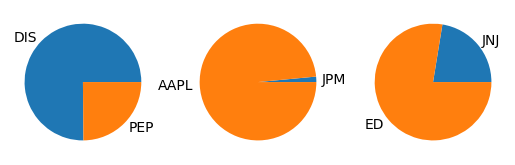

In [138]:
B = [8000, 1000, 1000]
V = [0.03, 0.05, 0.04]
overall_holdings = np.zeros(n)
total = 0

fig, ax = plt.subplots(nrows=1, ncols=3)

for i in range(3):
    x = MVO(r, Q, V[i], strategies[i])

    for j in range(len(x)):
        if x[j] < 0.01:
            x[j] = 0

    new_x = []
    new_tickers = []

    for index, weight in enumerate(x):
        if weight: 
            new_x.append(weight)
            new_tickers.append(tickers[index])

    plt.subplot(1, 3, i+1)
    plt.pie(new_x, labels=new_tickers)

    overall_holdings += (B[i]*x)

total_gain = R.T @ overall_holdings
c = (overall_holdings @ Q @ overall_holdings)/sum(B)

print(total_gain, c)